In [1]:
import random
from math import sin, cos
import matplotlib.pyplot as plt 

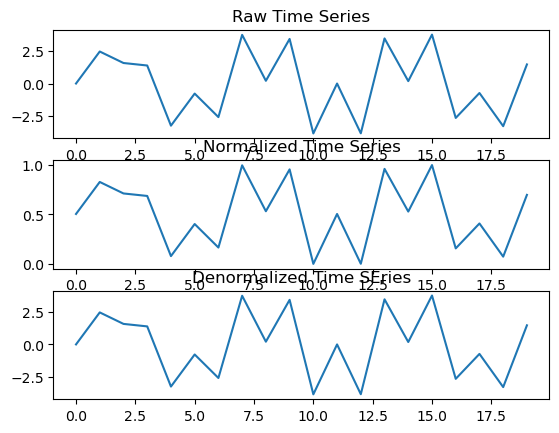

In [2]:
# Normalize 
def normalize(ts):
    max_ts = max(ts)
    min_ts = min(ts)
    normal_ts = [(v - min_ts) / (max_ts - min_ts) for v in ts]
    return normal_ts, max_ts, min_ts

def denormalize(ts, max_ts, min_ts):
    denormal_ts = [v * (max_ts - min_ts) + min_ts for v in ts]
    return denormal_ts

if __name__ == "__main__":
    random.seed(1)
    ts = [10 * sin(i) * cos(i) * cos(i) for i in range(20)]
    normal_ts, max_ts, min_ts = normalize(ts)
    denormal_ts = denormalize(normal_ts, max_ts, min_ts)
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.set_title("Raw Time Series")
    ax1.plot(ts)
    ax2.set_title("Normalized Time Series")
    ax2.plot(normal_ts)
    ax3.set_title("Denormalized Time SEries")
    ax3.plot(denormal_ts)
    plt.show()

In [3]:
# Detrend
import random 
from math import sin 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [4]:
def detrend(ts):
    x = [[i] for i in range(len(ts))]
    y = np.array(ts).reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    a = reg.coef_[0][0]
    b = reg.intercept_[0]
    detrend_ts = [(ts[i] - a * i - b) for i in range(len(ts))]
    return detrend_ts, a, b

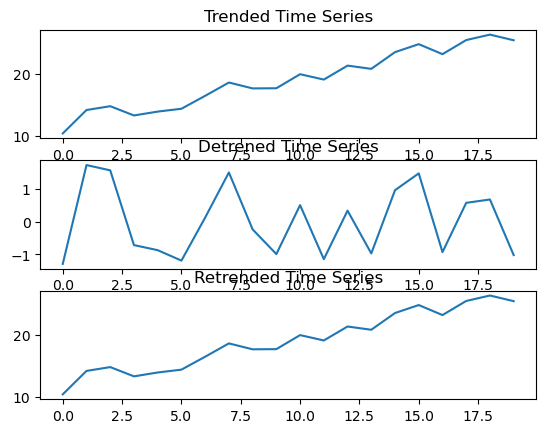

In [5]:
def retrend(ts, a, b):
    return [(ts[i] + a * i + b) for i in range(len(ts))]

if __name__ == "__main__":
    random.seed(1)
    
    ts = [10 + .8 * i + sin(i) + 3 * random.random() for i in range(20)]
    detrend_ts, a, b = detrend(ts)
    retrend_ts  = retrend(detrend_ts, a, b)
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.set_title("Trended Time Series")
    ax1.plot(ts)
    ax2.set_title("Detrened Time Series")
    ax2.plot(detrend_ts)
    ax3.set_title("Retrended Time Series")
    ax3.plot(retrend_ts)
    plt.show()

In [6]:
# Differencing - remove permanent or temporal trends in a time series 
import random
from math import sin
import matplotlib.pyplot as plt 


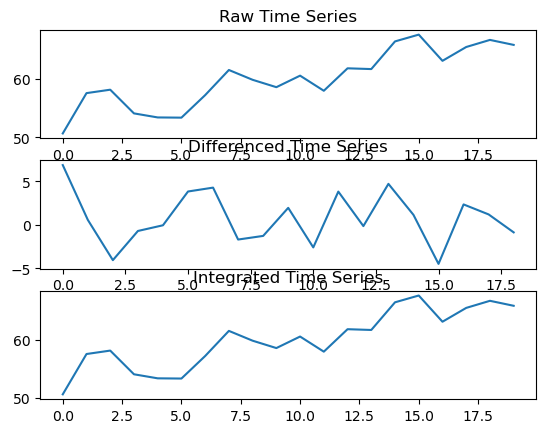

In [7]:
def differencing(ts):
    diff_ts = [(ts[i+1] - ts[i]) for i in range(len(ts) - 1)]
    return diff_ts, ts[0]

def integration(ts, b):
    int_ts = [b]
    for i in range(len(ts)):
        int_ts.append(ts[i] + int_ts[i])
    
    return int_ts

if __name__ == "__main__":
    random.seed(1)
    ts = [50 + .8 * i + 3 * sin(i) + 5 * random.random() for i in range(20)]  # a vector that changes with respect to the i? 
    diff_ts, b = differencing(ts)
    int_ts = integration(diff_ts, b)
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    ax1.set_title("Raw Time Series")
    ax1.plot(ts)
    ax2.set_title("Differenced Time Series")
    ax2.plot(diff_ts)
    ax3.set_title("Integrated Time Series")
    ax3.plot(int_ts)
    plt.show()

In [8]:
# Sliding Window - turning any time series dataset into a supervised learning problem
def sliding_window(ts, features):
    """
    args:
    features - how many sliding windows you would like to work on
    """
    
    X = []
    Y = []
    for i in range(features + 1, len(ts) + 1):
        X.append(ts[i - (features + 1): i - 1])
        Y.append([ts[i - 1]])
    
    return X, Y
if __name__ == '__main__':
    ts = list(range(6))
    X, Y = sliding_window(ts, 3)
    print(f'Time series: {ts}')
    print(f'X: {X}')
    print(f'Y: {Y}')


Time series: [0, 1, 2, 3, 4, 5]
X: [[0, 1, 2], [1, 2, 3], [2, 3, 4]]
Y: [[3], [4], [5]]


In [9]:
# Checking an estimate of the regression model's accuracy: absolute loss or mean squared error
# Loss - assumptions:
# 100 x (10 - |Price_real - Price_predicted|)$
# if forecast is completely accurate - |Price_real - Price_predicted| = 0, $$$1000
# if price_predicted * diff = 20 = -10 * 1000 = nothing 

# rule of thumbs - 
# Linear function and can afford rare high mistakes in forecasts - choose the absolute loss function
# but cannot afford high forecast deviation - always run out of medicine - minor deviation (MSE)

# Static processes - characteristics change quite rarely 
# Dynamic processes - constantly change their nature and establish new patterns

# Train set / validation set / test set - cross-validation (validation set has to be most recent data)


In [10]:
import torch
import interpolated_time_series

def get_training_datasets(features, test_len):
    ts = interpolated_time_series()  # Remove all N/A values
    X, Y = sliding_window(ts, features)
    X_train, Y_train, X_test, Y_test = X[0:-test_len], Y[0:-test_len], X[-test_len:], Y[-test_len:]
    
    train_len = round(len(ts) * 0.7)
    X_train, X_val, Y_train, Y_val = X_train[0:train_len], X_train[train_len:]
    Y_train[0:train_len], Y_train[train_len:]
x_train = torch.tensor(data = X_train)
y_train = torch.tensor(data = Y_train)
x_val = torch.tensor(data = X_val)
y_val = torch.tensor(data = Y_val)
x_test = torch.tensor(data = X_test)
y_test = torch.tensor(data = Y_test)
return x_train, x_val, x_test, y_train, y_val, y_test

ModuleNotFoundError: No module named 'interpolated_time_series'